# Lending Group Case Study

## **Problem Statement**

The goal is to reduce **credit loss** by identifying **risky loan applicants (defaulters)** based on patterns in the data. Using EDA, you will analyze consumer and loan attributes to uncover the driving factors behind loan defaults. This information will help the company make better decisions on loan approvals, such as:
- Rejecting risky applications
- Reducing loan amounts
- Increasing interest rates for specific categories of borrowers

### **Classify Loan Outcomes**:
1. **Fully Paid**: Applicants who repaid the loan successfully.
2. **Current**: Applicants still paying their loan installments (not defaulted yet).
3. **Charged-Off**: Applicants who defaulted on the loan, causing financial losses.

> **Applicants in the "Charged-Off" category are considered defaulters.**

---

## **Identify Driver Variables**
- Analyze consumer demographics, credit attributes, and loan attributes to determine the factors contributing to defaults.
- These insights will guide the company to:
  - Target low-risk applicants
  - Avoid financial losses
  - Optimize loan approval strategies

---

## **Steps for Processing**

### **1. Data Understanding**
- Start by loading and examining the dataset (`loan.csv`).
- Identify the dataset’s structure:
  - Number of rows and columns
  - Data types of columns
  - Presence of null values
  - General overview of variables

---

### **2. Data Cleaning**
1. **Handling Missing Values**:
   - Impute missing values using appropriate strategies or drop them based on their relevance to the analysis.

2. **Standardizing Values**:
   - Ensure categorical variables are consistent and properly formatted for analysis.

3. **Dropping Unnecessary Columns**:
   - Remove columns that are redundant or irrelevant to simplify the dataset.

4. **Investigating Outliers**:
   - Inspect numerical columns for potential outliers.
   - Determine the handling strategy (e.g., capping, transformation, or removal) based on their impact on the analysis.

5. **Handling Invalid Values**:
   - Identify and correct or remove values that are inconsistent or logically incorrect.

6. **Filtering Data**:
   - Apply filters to retain only the relevant data for the analysis, based on specific conditions or criteria.


### Import necessary Libraries

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Common function definition

In [391]:
# Drops the specified columns from the given DataFrame.
def drop_columns(dataframe, columns):
    dataframe.drop(columns=columns, inplace=True)
    return dataframe

In [392]:
# Function to create boxplot
def create_boxplot(data, column, title=None):
    sns.boxplot(data[column])

    # Add title if provided, otherwise use a default one
    if title:
        plt.title(title)
    else:
        plt.title(f"Boxplot of {column}")
    plt.show()

In [393]:
# Function to get distinct value of a specific column
def get_distinct_values(data, column):
    return data[column].unique().tolist()

In [394]:
# Function to get value counts of a specific column
def get_value_counts(data, column):
    return data[column].value_counts()

In [395]:
# Function to list out null values sum in DataFrame
def null_values_summary(data):
    return data.isna().sum().sort_values(ascending=False)


### Reading data from the provided 'loan.csv' file

In [396]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [397]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Handle missing data

**Check whether null values and how much they are in the loan data**

In [398]:
null_values_summary(loan)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

*There are multiple columns having null value. Considering to drop of them*

**Count columns which having more than 80% of null value itself**

In [399]:
# Count the number of columns with  null values
missing_values_threshold = 80 #80%
missing_values_threshold_percentage = missing_values_threshold/100
missing_values_columns = (loan.isnull().mean() > missing_values_threshold_percentage).sum()

print(f"Number of columns with more than {missing_values_threshold}% null values: {missing_values_columns}/{loan.shape[1]}")

Number of columns with more than 80% null values: 56/111


**Decide to drop columns having more than 80% null column**

In [400]:
loan = loan.loc[:, loan.isnull().mean() < missing_values_threshold_percentage]
loan.shape

(39717, 55)

### Drop all unnecessary columns

*There are several columns that may not be relevant for the analysis and can therefore be excluded or dropped from the dataset.*

In [401]:
# List of columns to drop
unnecessary_columns_to_drop = [
    # Unique Identifiers
    'id', 'member_id',

    # System Metadata
    'url', 'desc', 'policy_code', 'application_type',

    # Redundant Features
    'funded_amnt', 'funded_amnt_inv',

    # Irrelevant
    'total_pymnt', 'total_rec_prncp', 'total_rec_int',
    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
    'out_prncp', 'out_prncp_inv', 'last_credit_pull_d',

    # Additional Columns
    'emp_title', 'initial_list_status', 'pymnt_plan', 'earliest_cr_line',
    'inq_last_6mths', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
    'recoveries', 'revol_bal', 'revol_util', 'title', 'total_acc',
    'total_pymnt_inv', 'total_rec_late_fee', 'url', 'zip_code',
    'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq'
]

# Drop the specified columns and display the altered DataFrame's shape
drop_columns(loan, unnecessary_columns_to_drop)
loan.shape

(39717, 20)

### Handle invalid values

**Check duplicated row**

*This helps ensure data quality and avoid redundancy in the analysis.*

In [402]:
duplicated_sum =  loan.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_sum}")

Number of duplicated rows: 0


*There is no duplicated row. No action required*

**Check single unique value columns**

In [403]:
# Check for single unique value columns
single_unique_cols = loan.columns[loan.nunique() == 1]

# Print the names of columns with a single unique value
print(f"Columns with a single unique value: {single_unique_cols.shape[0]}")


Columns with a single unique value: 5


**Drop single unique value columns**

In [404]:
drop_columns(loan, single_unique_cols)
loan.shape

(39717, 15)

### Filtering data

**Drop loan status as 'Current'**

_Records where `loan_status` is marked as *'Current'* can be dropped from the dataset, as loans in progress do not provide insights into the borrower's likelihood of default. These records are excluded to focus the analysis on completed loan outcomes._

In [405]:
# Drop rows where loan_status is 'Current'
loan.drop(loan[loan['loan_status'].str.strip().str.lower() == 'current'].index, inplace=True)
loan.shape

(38577, 15)

### Standardising values

**Check datatype**

In [406]:
loan.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

*The column 'loan_amnt' must be float number instead of integer number. Decide to convert datatype for this column*

In [407]:
#Convert to float for loan_amnt
loan = loan.astype({
    'loan_amnt' : 'float'
})

**Convert data**

In [408]:
# Convert term value to number only (int)
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [409]:
# Convert term value  to number only (float)
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [410]:
# Convert and extract month and year
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_month'] = loan['issue_d'].dt.strftime('%B')
loan['issue_year'] = loan['issue_d'].dt.year
drop_columns(loan, ['issue_d'])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_month,issue_year
0,5000.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,December,2011
1,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,December,2011
2,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,December,2011
3,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,December,2011
5,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,December,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,July,2007
39713,8500.0,36,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,July,2007
39714,5000.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,July,2007
39715,5000.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,July,2007


In [411]:
# Convert float values to 2 decimals.
for col in ['loan_amnt', 'int_rate', 'annual_inc', 'dti']:
    loan[col] = loan[col].apply(lambda x: round(x, 2))

### Remove outliers

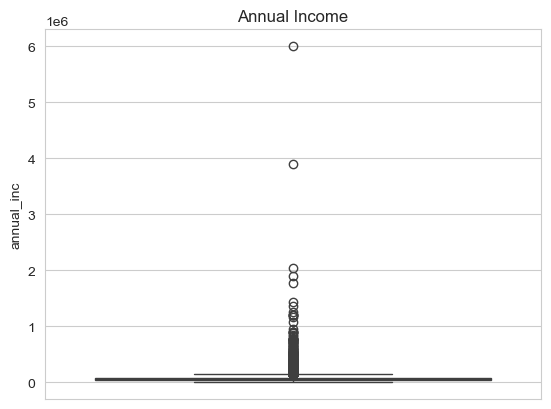

In [412]:
# Visualizing annual income
create_boxplot(
    loan,
    'annual_inc',
    'Annual Income')

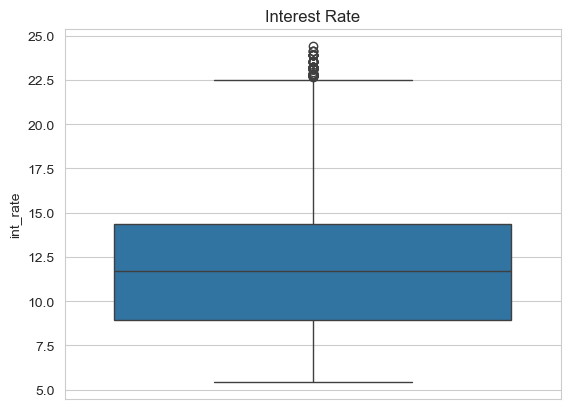

In [413]:
create_boxplot(
    loan,
    'int_rate',
    'Interest Rate')

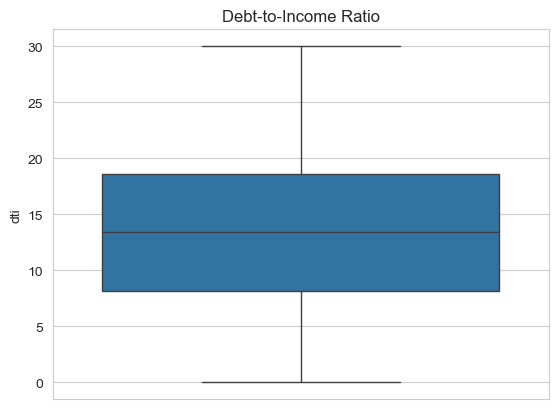

In [414]:
create_boxplot(
    loan,
    'dti',
    'Debt-to-Income Ratio')

***Can see that annual income having outliers. Outliers tend to lie far from the median. Use **Interquartile Range (IQR)** for skewed data.***

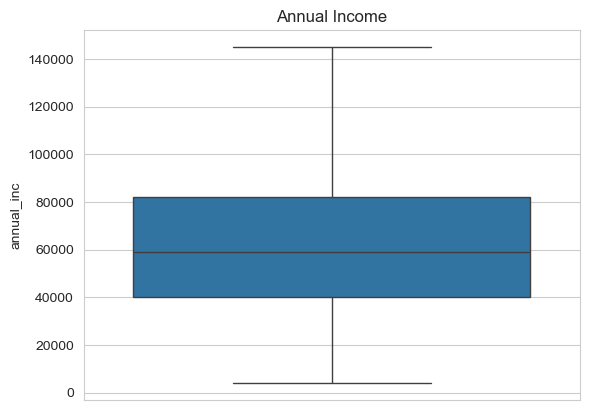

In [415]:
# Calculate inter quartile
annual_income = loan['annual_inc']
Q1 = annual_income.quantile(0.25)
Q3 = annual_income.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


 # Handle Outliers
loan['annual_inc'] = annual_income.clip(lower=lower_bound, upper=upper_bound)

# Visualize Outliers (Boxplot)
create_boxplot(
    loan,
    'annual_inc',
    'Annual Income')



### Imputing values

**Handle data for verification_status column**

In [416]:
# Get distinct values of a column
get_distinct_values(loan, 'verification_status')


['Verified', 'Source Verified', 'Not Verified']

***Can see that Verified and Source Verified are both the same meaning so replacing all Source Verified to Verified***

In [417]:
loan['verification_status'].replace('Source Verified', 'Verified', inplace = True)
get_distinct_values(loan, 'verification_status')

['Verified', 'Not Verified']

**Handle data for home_ownership column**

In [418]:
get_value_counts(loan, 'home_ownership')

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

***NONE can be treated as OTHER***

In [419]:
loan['home_ownership'].replace('NONE', 'OTHER', inplace = True)
get_distinct_values(loan, 'home_ownership')


['RENT', 'OWN', 'MORTGAGE', 'OTHER']

**Handle Employment Length (emp_length)**

Handle data for emp_length column to extract numeric values and convert it to integer

In [420]:
# 1. Clean the `emp_length` column by extracting numeric values
def clean_emp_length(emp_length):
    if isinstance(emp_length, str):
        if 'year' in emp_length:
            emp_length = emp_length.replace(' years', '').replace(' year', '')
        if '+' in emp_length:
            emp_length = emp_length.replace('+', '')
        if '<' in emp_length:
            emp_length = '0'
        return pd.to_numeric(emp_length, errors='coerce')
    return emp_length


loan['emp_length'] = loan['emp_length'].apply(clean_emp_length).astype('Int64')
# # Sort the DataFrame by the cleaned emp_length column
loan.sort_values(by='emp_length', ascending=False, inplace=True)

get_distinct_values(loan, 'emp_length')

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, <NA>]

**Check missing data**

In [421]:
null_values_summary(loan)

emp_length             1033
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
issue_month               0
issue_year                0
dtype: int64

There are 1033 missing value rows for Employment Length (emp_length) which needs to imputing value.
Try to explore Annual Income (annual_inc)

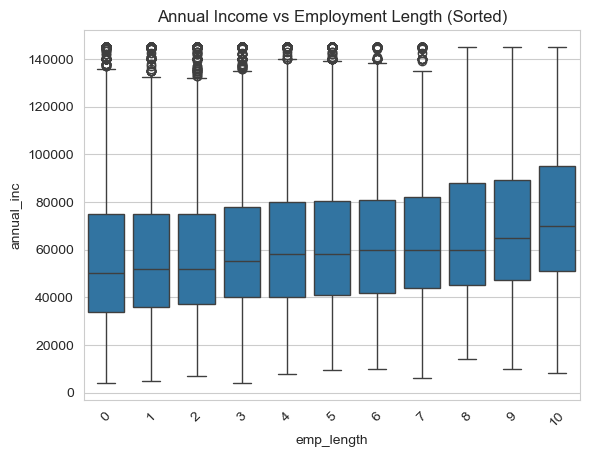

In [422]:
sns.boxplot(x='emp_length', y='annual_inc', data=loan)
plt.title('Annual Income vs Employment Length (Sorted)')
plt.xticks(rotation=45)
plt.show()

**Insight**:
- annual_inc` increases consistently with `emp_length`, we can use income as a predictor for imputing employment length.

In [423]:
#Create the `income_bucket` column
loan['income_bucket'] = pd.cut(
    loan['annual_inc'],
    bins=[0, 50000, 100000, 150000, 200000, 1e6],
    labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
)

#Calculate the median emp_length for each income bucket
bucket_medians = loan.groupby('income_bucket')['emp_length'].median()

#Impute missing emp_length values based on the income bucket
for bucket, median in bucket_medians.items():
    loan.loc[
        (loan['income_bucket'] == bucket) & (loan['emp_length'].isna()),
        'emp_length'
    ] = median
# Verify the result
null_values_summary(loan)


loan_amnt              0
verification_status    0
issue_year             0
issue_month            0
dti                    0
addr_state             0
purpose                0
loan_status            0
annual_inc             0
term                   0
home_ownership         0
emp_length             0
sub_grade              0
grade                  0
installment            0
int_rate               0
income_bucket          0
dtype: int64

**Create Year Experience Bucket based on Employment Length

In [424]:
# Create buckets
loan['emp_length_bucket'] = pd.cut(
    loan['emp_length'],
    bins=[-1, 3, 5, 10, float('inf')],  # Define bins for each bucket
    labels=['0-3 years', '>3 and <5 years', '5 to <10 years', '+10 years'],  # Labels for the buckets
    right=False  # Exclude the right edge of intervals (e.g., 5 is in '5 to <10')
)

# # Correct the label for the exact 10 years
# loan['emp_length_bucket'] = loan['emp_length_bucket'].cat.add_categories('10 years').replace(
#     {pd.Interval(10.0, float('inf'), closed='left'): '10 years'})
# loan['emp_length_bucket'].cat.reorder_categories(['0-3 years', '5 to <10 years', '10 years', '>3 and <5 years'], inplace=True)

**Final data**


In [425]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_month,issue_year,income_bucket,emp_length_bucket
0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,AZ,27.65,December,2011,0-50k,+10 years
24974,16000.0,36,11.86,530.36,B,B5,10,RENT,74337.72,Verified,Fully Paid,debt_consolidation,CA,18.79,October,2010,50k-100k,+10 years
9228,18225.0,60,17.49,457.76,D,D5,10,MORTGAGE,55000.00,Verified,Fully Paid,credit_card,IL,20.84,August,2011,50k-100k,+10 years
24965,1800.0,36,13.23,60.85,C,C1,10,RENT,29040.00,Verified,Charged Off,car,MA,3.08,October,2010,0-50k,+10 years
9230,6800.0,36,18.39,247.17,E,E2,10,MORTGAGE,70000.00,Verified,Fully Paid,debt_consolidation,NC,21.02,August,2011,50k-100k,+10 years


## Data Analysis

### Univariate Analysis

1. **Categorical variables**
   - **Ordered categorical data**:
     1. Grade (`grade`)
     2. Sub grade (`sub_grade`)
     3. Term (`term`)
     4. Employment length (`emp_length`)
     5. Issue year (`issue_year`)
     6. Issue month (`issue_month`)
     7. Income bucket ('income_bucket')
     8. Employment Length Bucket ('emp_length_bucket')

   - **Unordered categorical data**:
     1. Address State (`addr_state`)
     2. Loan purpose (`purpose`)
     3. Home Ownership (`home_ownership`)

2. **Quantitative variables**:
   1. Interest rate (`int_rate`)
   2. Annual income (`annual_inc`)
   3. Loan amount (`loan_amnt`)
   4. Debt to Income Ratio (`dti`)
   5. Monthly Installment (`installment`)


** Common functions for analysis

In [426]:
FIG_SIZE = (8, 6)

In [427]:
def create_barplot(x, y, title=None, xlabel=None, ylabel=None, palette="coolwarm", rotation=0):
    # Set plot size and style
    plt.figure(figsize=FIG_SIZE)
    sns.set_style("whitegrid")

    # Create bar plot
    sns.barplot(
        x=x,
        y=y,
        palette=palette
    )

    # Add titles and labels
    if title is not None:
        plt.title(title, fontsize=14, weight='bold')
    if xlabel is not None:
        plt.xlabel(xlabel, fontsize=12)
    else:
        plt.xlabel("Count", fontsize=12)

    if ylabel is not None:
        plt.ylabel(ylabel, fontsize=12)
    else:
        plt.ylabel("Categories", fontsize=12)

    # Rotate x-axis ticks if needed
    plt.xticks(rotation=rotation)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


In [428]:
def create_boxplot_chart(data, x, y, title=None, xlabel=None, ylabel=None, palette="coolwarm", rotation=0):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Create the boxplot
    sns.boxplot(data=data, x=x, y=y, palette=palette)

    # Add the title if provided
    if title:
        plt.title(title, fontsize=14, weight='bold')

    # Add x-axis label if provided
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)

    # Add y-axis label if provided
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis ticks if needed
    plt.xticks(rotation=rotation)

    # Show the plot
    plt.tight_layout()
    plt.show()


**Filtered by 'Charged Off'**

In [429]:
# Filter data
charged_off_data = loan[loan['loan_status'] == 'Charged Off']

**Distribution of Loan Status**

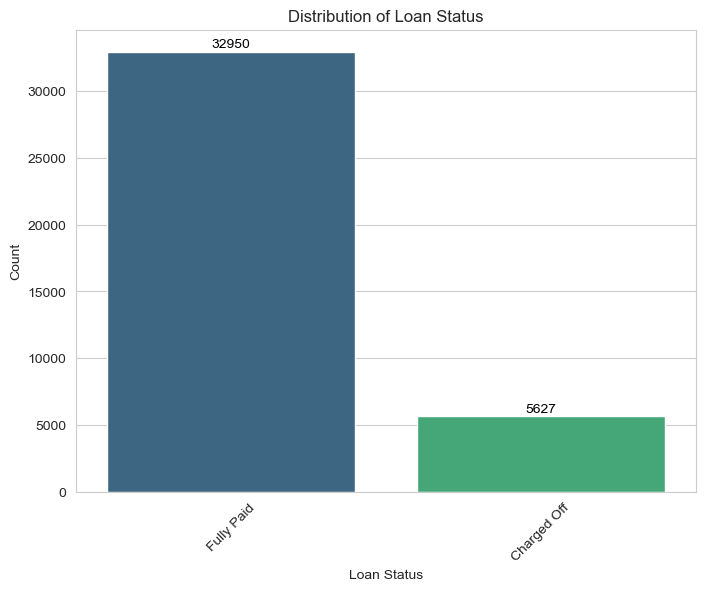

In [430]:
plt.figure(figsize=FIG_SIZE)
sns.set_style("whitegrid")
ax = sns.countplot(data=loan, x='loan_status', palette='viridis', order=loan['loan_status'].value_counts().index)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Distribution of Interest Rate**

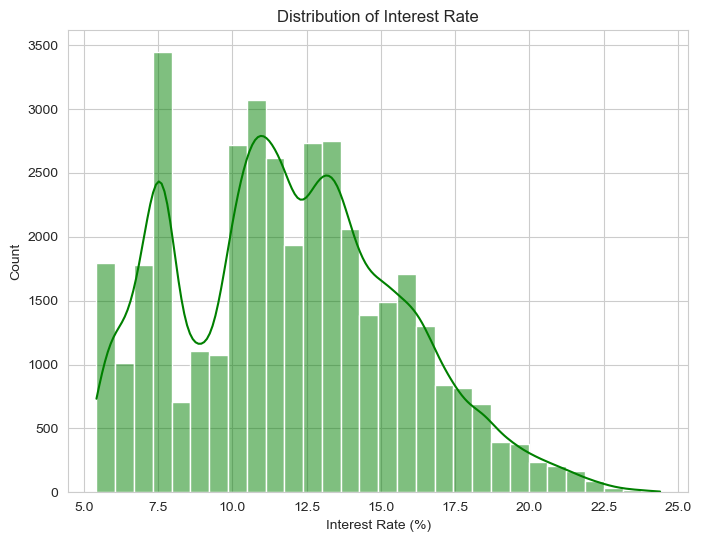

In [431]:
plt.figure(figsize=FIG_SIZE)
sns.set_style("whitegrid")
sns.histplot(loan['int_rate'], kde=True, bins=30, color='green')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.show()

**Loan Term Distribution for 'Charged Off' Status"**

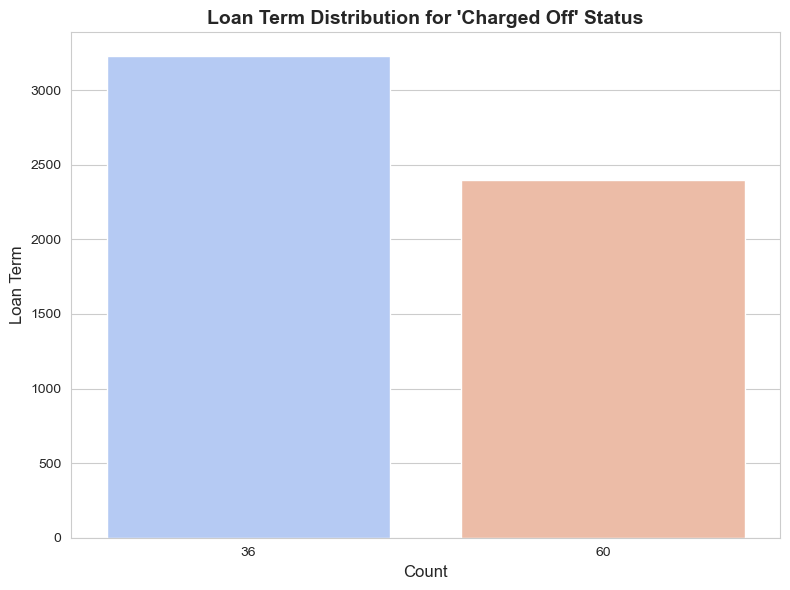

In [432]:
# Calculate data
x_data = charged_off_data['term'].value_counts().index  # Categories (y)
y_data = charged_off_data['term'].value_counts().values  # Counts (x)

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Loan Term Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Loan Term"
)



**Employment Length Distribution for 'Charged Off' Status**

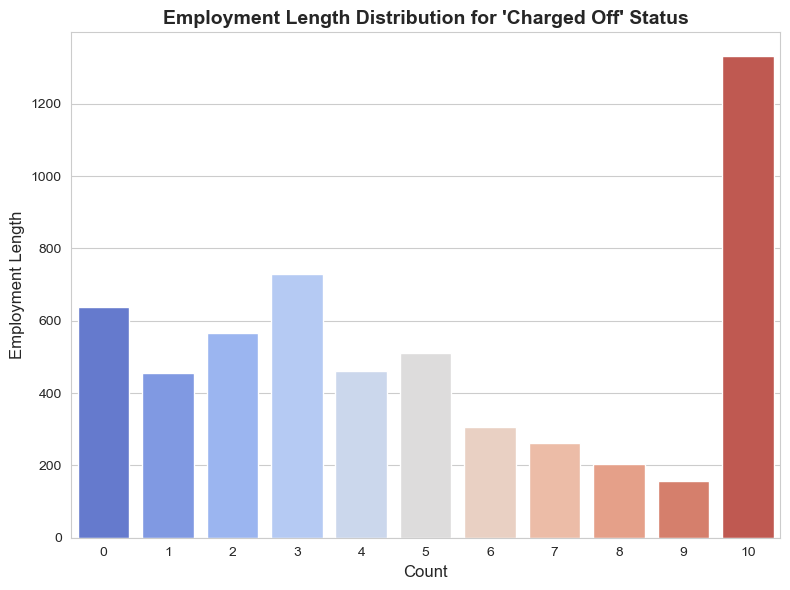

In [433]:
# Extract data for plotting
y_data = charged_off_data['emp_length'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Employment Length Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Employment Length"
)

**Loan Purpose Distribution for 'Charged Off' Status"**

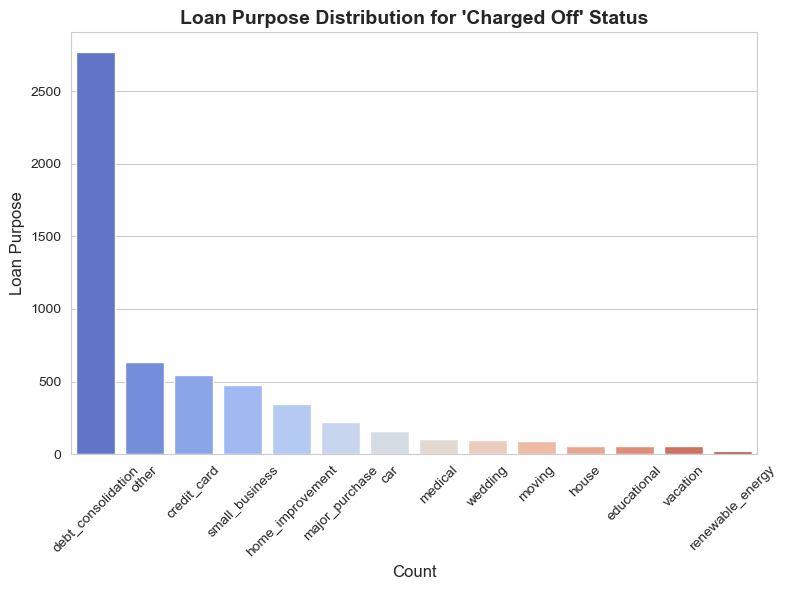

In [434]:
# Extract data for plotting
y_data = charged_off_data['purpose'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Loan Purpose Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Loan Purpose",
    rotation=45
)

**Home Ownership Distribution for 'Charged Off' Status**

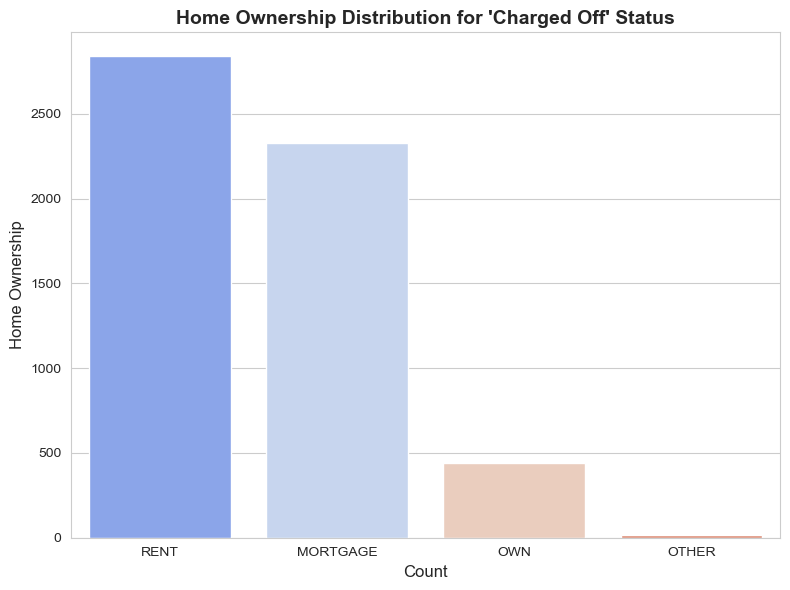

In [435]:
# Extract data for plotting
y_data = charged_off_data['home_ownership'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Home Ownership Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Home Ownership"
)

**Annual Income Distribution for 'Charged Off' Status**

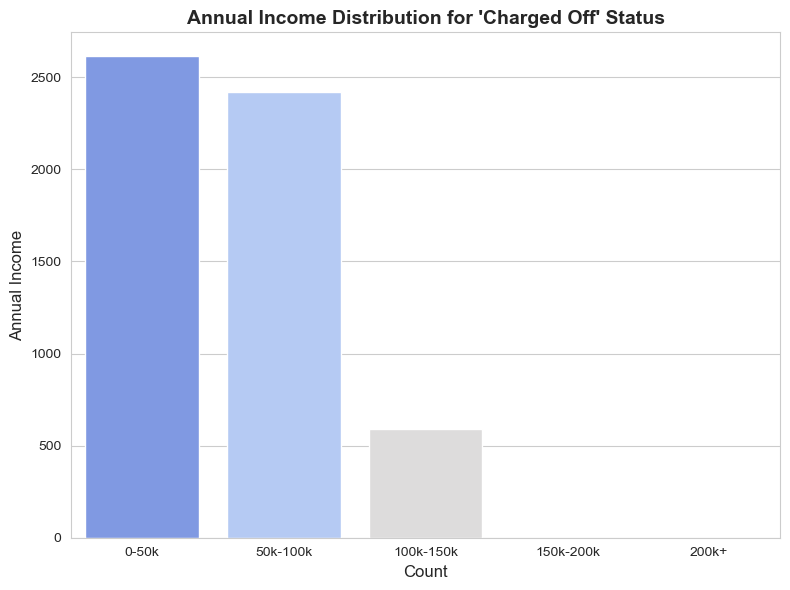

In [436]:
# Extract data for plotting
y_data = charged_off_data['income_bucket'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Annual Income Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Annual Income"
)

**Annual Income Distribution for 'Charged Off' Status**

### Bivariate Analysis

**Term vs Loan Status**

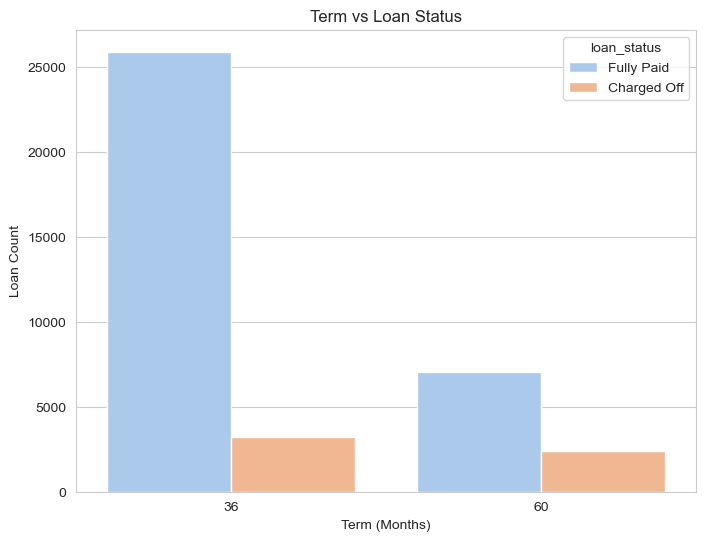

In [437]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

sns.countplot(x='term', hue='loan_status', data=loan, palette='pastel')

ax.set_xlabel("Term (Months)")
ax.set_ylabel("Loan Count")

ax.set_title('Term vs Loan Status')

plt.show()

**Interest Rate vs Loan Status**

In [438]:
get_distinct_values(loan, 'emp_length')

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

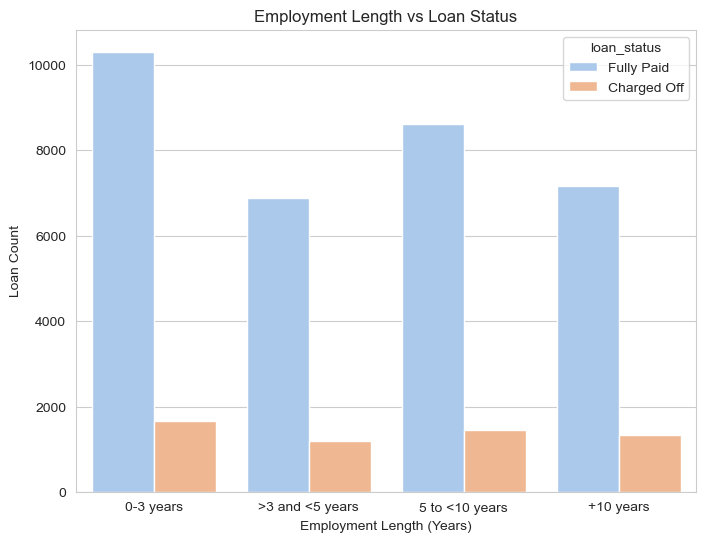

In [439]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
sns.countplot(x='emp_length_bucket', hue='loan_status', data=loan, palette='pastel')

ax.set_xlabel("Employment Length (Years)")
ax.set_ylabel("Loan Count")

ax.set_title('Employment Length vs Loan Status')

plt.show()

**Loan Status vs Loan Amount**

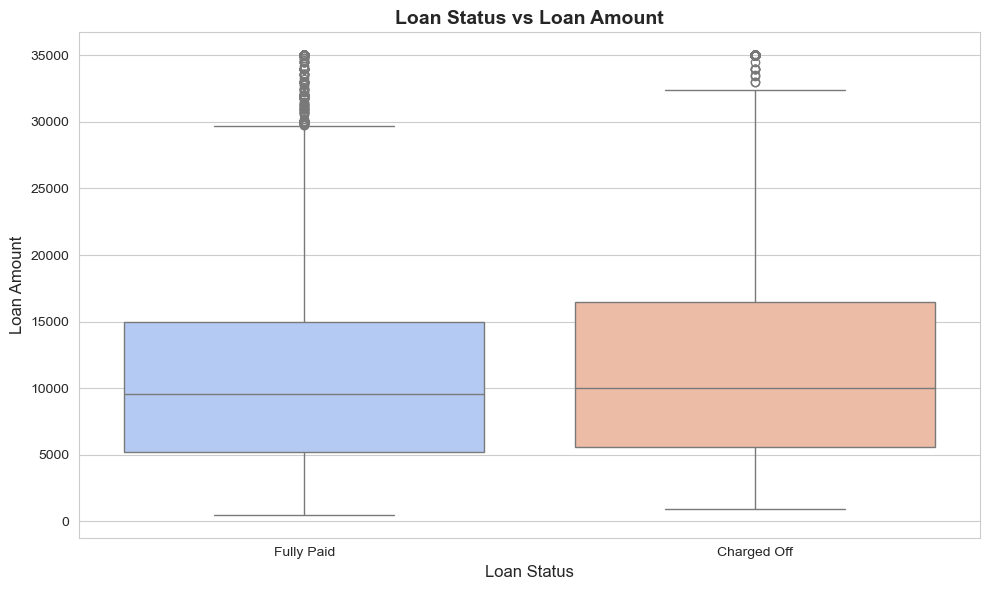

In [440]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='loan_amnt',
    title='Loan Status vs Loan Amount',
    xlabel='Loan Status',
    ylabel='Loan Amount'
)


**Loan Status vs Annual Income**

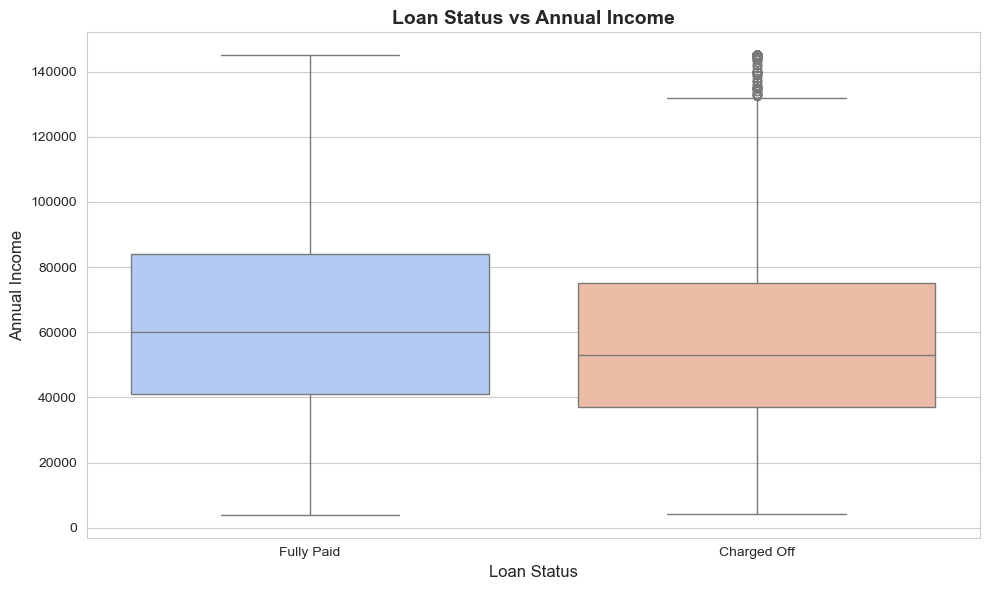

In [441]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='annual_inc',
    title='Loan Status vs Annual Income',
    xlabel='Loan Status',
    ylabel='Annual Income'
)

**Loan Status vs DTI**

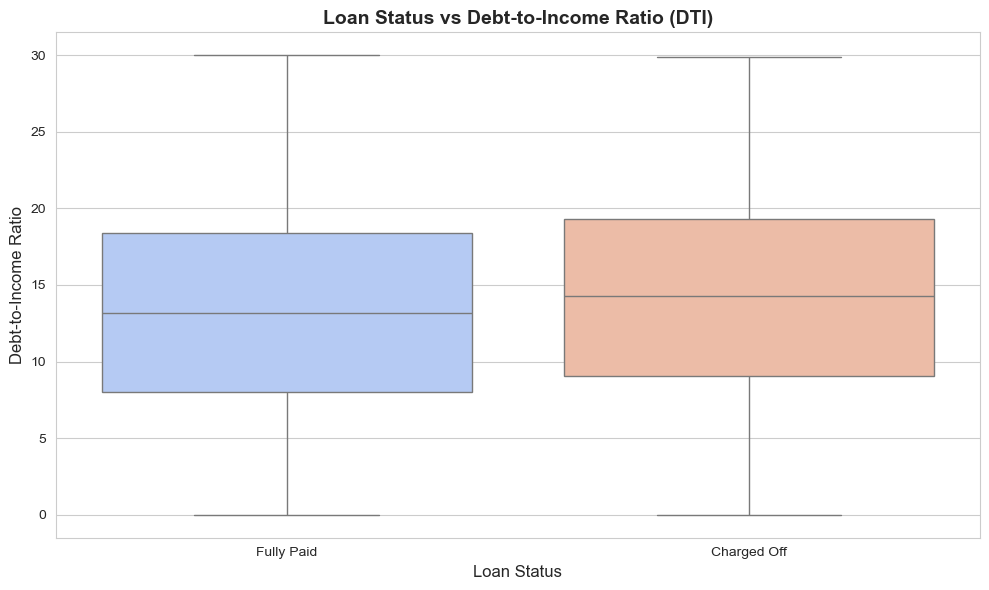

In [442]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='dti',
    title='Loan Status vs Debt-to-Income Ratio (DTI)',
    xlabel='Loan Status',
    ylabel='Debt-to-Income Ratio'
)

**Interest Rate Distribution by Loan Status**

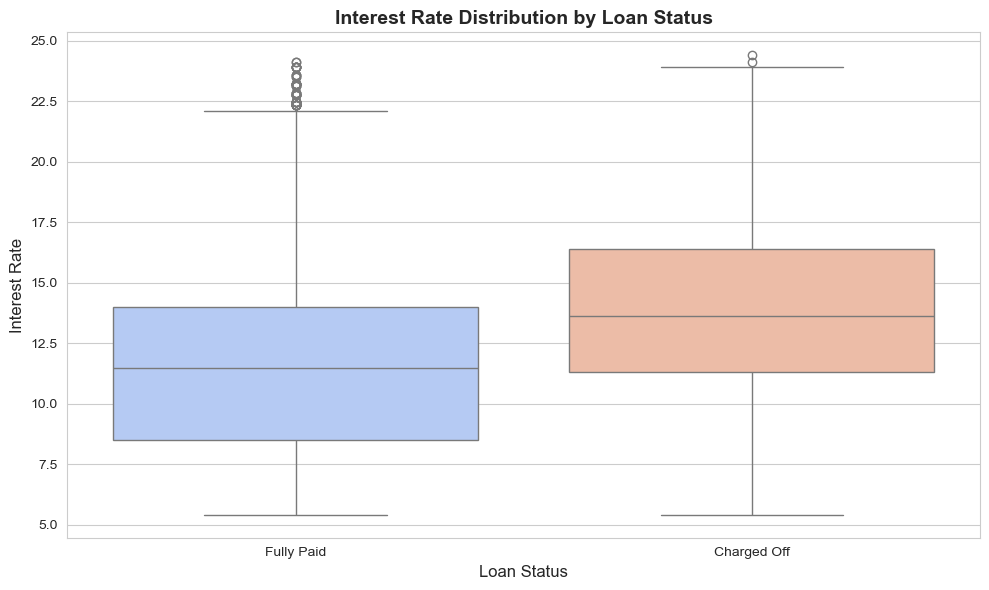

In [443]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='int_rate',
    title='Interest Rate Distribution by Loan Status',
    xlabel='Loan Status',
    ylabel='Interest Rate'
)

**Correlation heatmap for "Charged Off" loans**

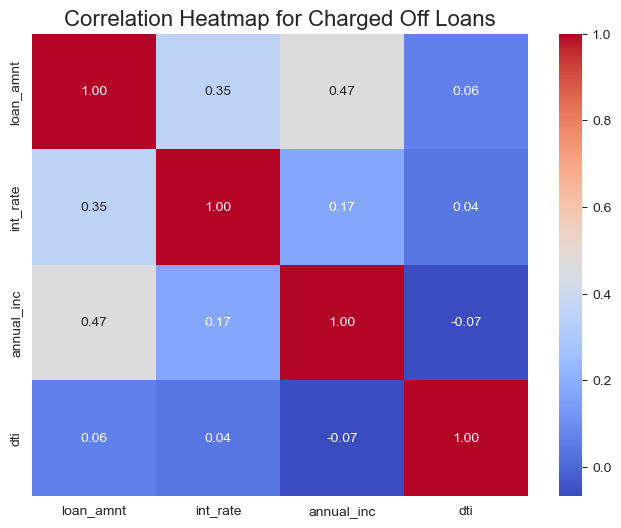

In [444]:
# Correlation heatmap for "Charged Off" loans

plt.figure(figsize=FIG_SIZE)
sns.heatmap(charged_off_data[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Charged Off Loans', fontsize=16)
plt.show()